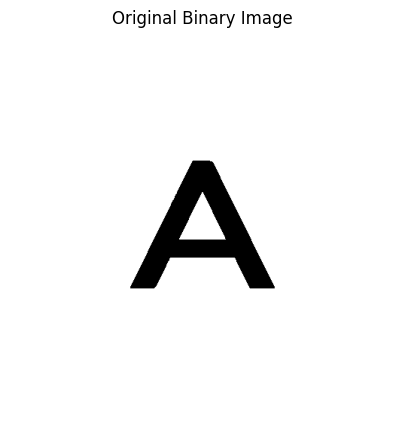

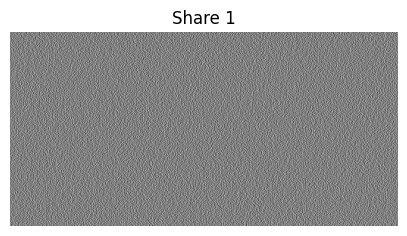

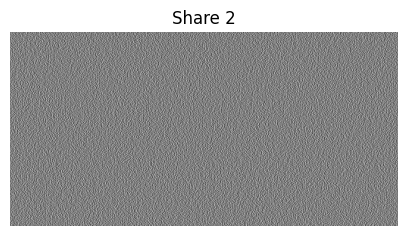

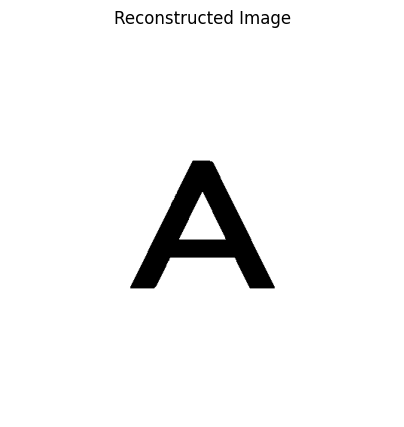

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def construct_shares(image, k):
    """Generate shares using Construction 2."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((k, height, width * num_subpixels), dtype=int)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            if pixel == 0:  # Black pixel
                subpixel_pattern = C0
            else:  # White pixel
                subpixel_pattern = C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for s in range(k):
                shares[s, i, j * num_subpixels : (j + 1) * num_subpixels] = permuted_pattern[s]

    return shares


def reconstruct_image(shares, k, original_width):
    """Reconstruct the image from shares."""
    num_subpixels = shares[0].shape[1] // original_width
    height, full_width = shares[0].shape
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= shares[s, i, j * num_subpixels : (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 2  # Number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares(binary_image, k)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k, binary_image.shape[1])

# Step 4: Display the images individually
display_image_individually(binary_image, "Original Binary Image")

# Display each share individually
for i in range(k):
    display_image_individually(shares[i], f"Share {i + 1}")

# Display the reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image")


/tmp/ipykernel_11423/3471452887.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  binary_image = np.array(image) > threshold  # Binary threshold


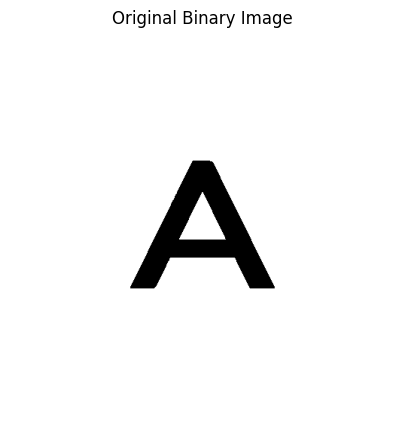

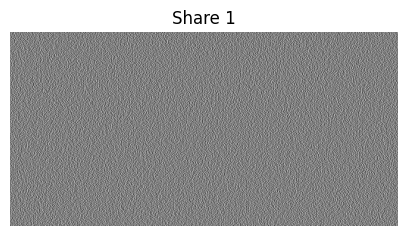

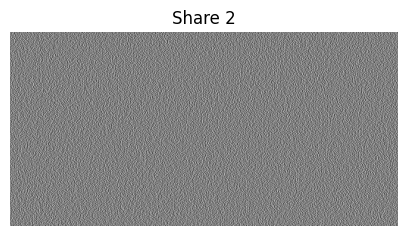

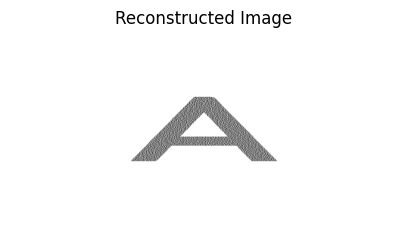

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def construct_shares(image, k):
    """Generate shares using Construction 2."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((k, height, width * num_subpixels), dtype=int)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            if pixel == 0:  # Black pixel
                subpixel_pattern = C0
            else:  # White pixel
                subpixel_pattern = C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for s in range(k):
                shares[s, i, j * num_subpixels : (j + 1) * num_subpixels] = permuted_pattern[s]

    return shares


def reconstruct_image(shares, k):
    """Reconstruct the image from shares."""
    height, full_width = shares[0].shape
    num_subpixels = full_width // shares.shape[2]  # Number of subpixels per pixel in the original image
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= shares[s, i, j * num_subpixels : (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 2  # Number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares(binary_image, k)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k)

# Step 4: Display the images individually
display_image_individually(binary_image, "Original Binary Image")

# Display each share individually
for i in range(k):
    display_image_individually(shares[i], f"Share {i + 1}")

# Display the reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image")


/tmp/ipykernel_11423/4024540612.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  binary_image = np.array(image) > threshold  # Binary threshold


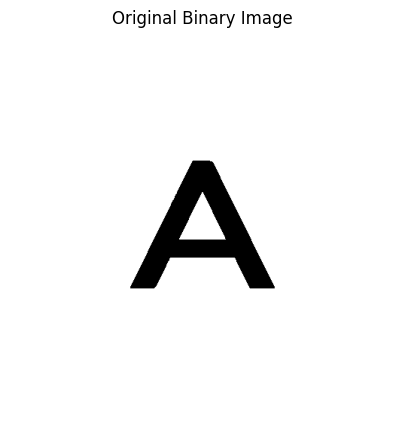

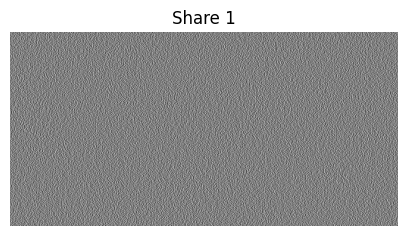

Share 1 saved as /home/arvind/VC/share_share_1.png


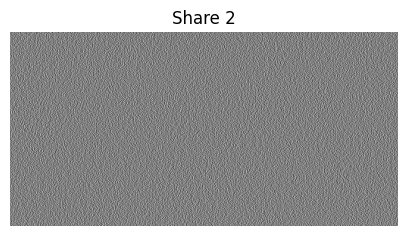

Share 2 saved as /home/arvind/VC/share_share_2.png


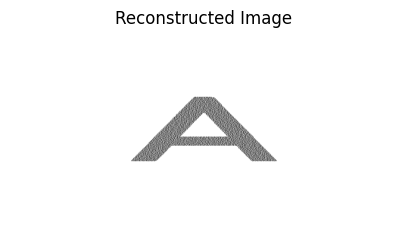

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def construct_shares(image, k):
    """Generate shares using Construction 2."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((k, height, width * num_subpixels), dtype=int)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            if pixel == 0:  # Black pixel
                subpixel_pattern = C0
            else:  # White pixel
                subpixel_pattern = C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for s in range(k):
                shares[s, i, j * num_subpixels : (j + 1) * num_subpixels] = permuted_pattern[s]

    return shares


def reconstruct_image(shares, k):
    """Reconstruct the image from shares."""
    height, full_width = shares[0].shape
    num_subpixels = full_width // shares.shape[2]  # Number of subpixels per pixel in the original image
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= shares[s, i, j * num_subpixels : (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


def save_share_image(share, share_index, file_prefix):
    """Save each share as an image."""
    pil_image = Image.fromarray(share.astype(np.uint8) * 255)  # Convert to a PIL image and scale (0, 1) to (0, 255)
    file_name = f"{file_prefix}_share_{share_index + 1}.png"
    pil_image.save(file_name)
    print(f"Share {share_index + 1} saved as {file_name}")


# Parameters
k = 2  # Number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"
file_prefix = "/home/arvind/VC/share"  # Prefix for saving share images

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares(binary_image, k)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k)

# Step 4: Display and save the images
display_image_individually(binary_image, "Original Binary Image")

# Display and save each share individually
for i in range(k):
    display_image_individually(shares[i], f"Share {i + 1}")
    save_share_image(shares[i], i, file_prefix)  # Save the share as a file

# Display the reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image")


/tmp/ipykernel_3310/1881405987.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  binary_image = np.array(image) > threshold  # Binary threshold


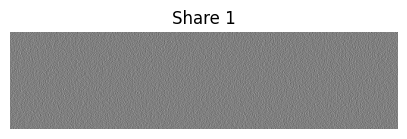

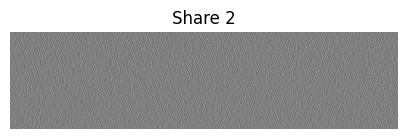

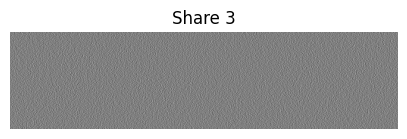

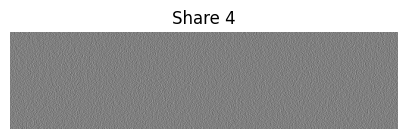

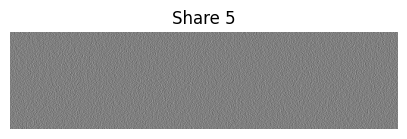

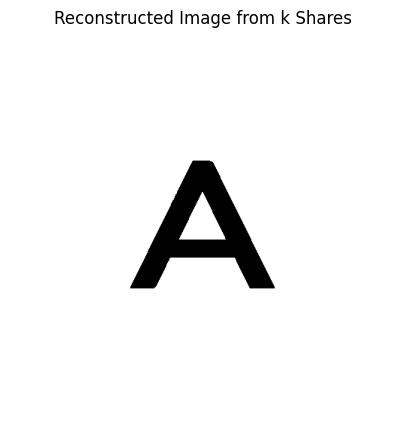

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from itertools import combinations


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def generate_mapping_functions(n, k):
    """Generate a collection of random functions mapping {1..n} -> {1..k}."""
    return [random.randint(0, k - 1) for _ in range(n)]


def construct_shares_k_out_of_n(image, k, n):
    """Generate shares for a (k, n) scheme based on a (k, k) base scheme."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]

    # Generate random mapping functions h(j) for each participant
    h_functions = generate_mapping_functions(n, k)

    # Shares for n participants
    shares = np.zeros((n, height, width * num_subpixels), dtype=int)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            subpixel_pattern = C0 if pixel == 0 else C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for participant in range(n):
                row_index = h_functions[participant]
                shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

    return shares


def reconstruct_image(shares, k, original_width):
    """Reconstruct the image from shares."""
    num_subpixels = shares[0].shape[1] // original_width
    height, full_width = shares[0].shape
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= shares[s, i, j * num_subpixels: (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 3  # Minimum shares required
n = 5  # Total number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares for (k, n) scheme
shares = construct_shares_k_out_of_n(binary_image, k, n)

# Step 3: Display each share individually
for i in range(n):
    display_image_individually(shares[i], f"Share {i + 1}")

# Step 4: Reconstruction from k shares
selected_shares = shares[:k]  # Select any k shares for reconstruction
reconstructed_image = reconstruct_image(selected_shares, k, binary_image.shape[1])

# Step 5: Display reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image from k Shares")


/tmp/ipykernel_3310/4159698334.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  binary_image = np.array(image) > threshold  # Binary threshold


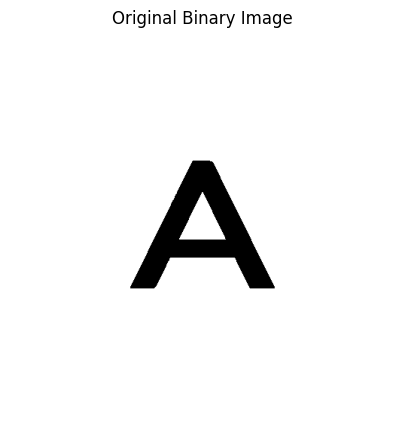

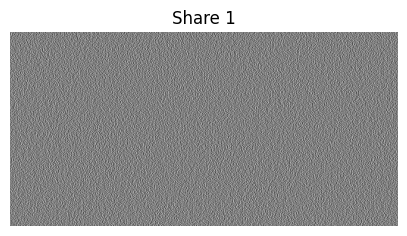

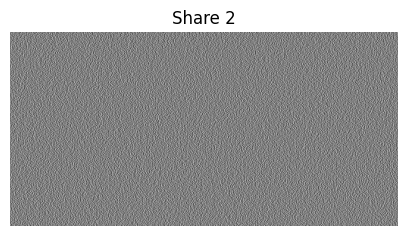

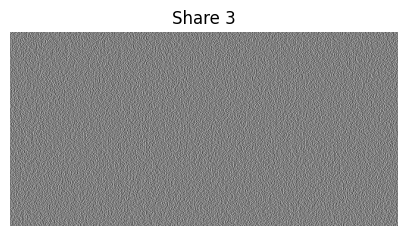

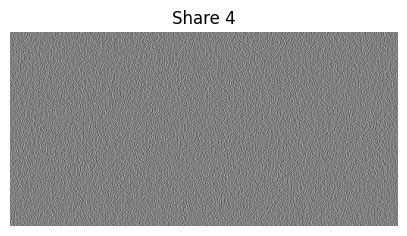

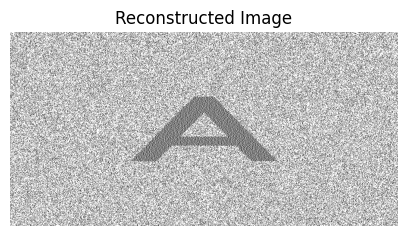

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations
import random


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def generate_random_functions(n, k):
    """Generate a collection of random functions mapping {1..n} -> {1..k}."""
    return [lambda x, k=k: random.randint(0, k - 1) for _ in range(n)]


def construct_shares_k_out_n(image, k, n):
    """Generate shares using a k-out-of-n construction."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((n, height, width * num_subpixels), dtype=int)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            if pixel == 0:  # Black pixel
                subpixel_pattern = C0
            else:  # White pixel
                subpixel_pattern = C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]

            # Distribute shares based directly on rows if k == n
            for participant in range(n):
                row_index = participant if k == n else random.randint(0, k - 1)
                shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

    return shares



def reconstruct_image(shares, k):
    """Reconstruct the image from any k shares."""
    height, full_width = shares[0].shape
    num_subpixels = full_width // shares.shape[2]
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    selected_shares = shares[:k]  # Use the first k shares (generalize as needed)

    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= selected_shares[s, i, j * num_subpixels: (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 2  # Minimum required shares
n = 4  # Total number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares_k_out_n(binary_image, k, n)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k)

# Step 4: Display the images individually
display_image_individually(binary_image, "Original Binary Image")

# Display each share individually
for i in range(n):
    display_image_individually(shares[i], f"Share {i + 1}")

# Display the reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image")

/tmp/ipykernel_3310/661332543.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  binary_image = np.array(image) > threshold  # Binary threshold


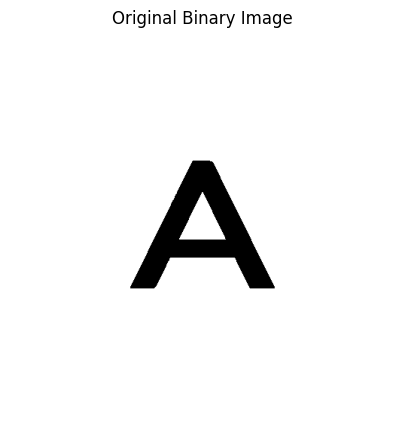

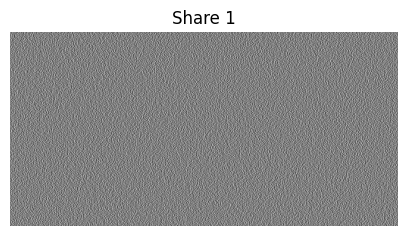

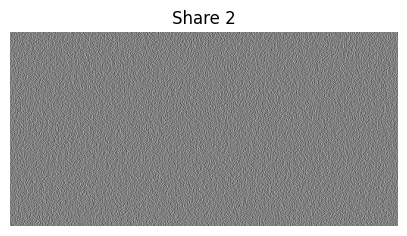

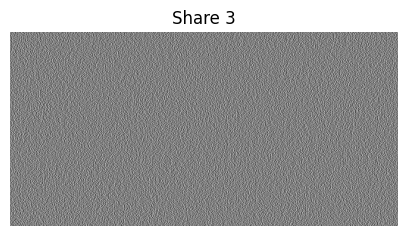

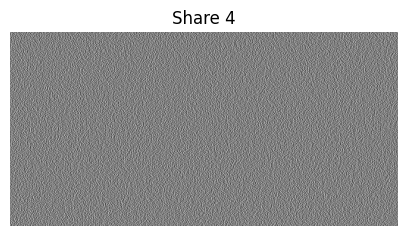

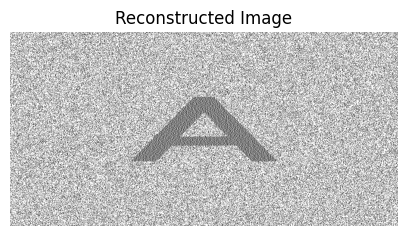

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations
import random


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def generate_random_functions(n, k, s):
    """Generate a collection of random functions mapping {1..n} -> {1..k}."""
    return [lambda x: random.randint(0, k - 1) for _ in range(s)]


def construct_shares_k_out_n(image, k, n, s):
    """Generate shares using a k-out-of-n construction."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((n, height, width * num_subpixels), dtype=int)
    H = generate_random_functions(n, k, s)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            if pixel == 0:  # Black pixel
                subpixel_pattern = C0
            else:  # White pixel
                subpixel_pattern = C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]

            # Distribute shares based on functions in H
            for participant in range(n):
                h = H[random.randint(0, s - 1)]
                row_index = h(participant)
                shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

    return shares


def reconstruct_image(shares, k):
    """Reconstruct the image from any k shares."""
    height, full_width = shares[0].shape
    num_subpixels = full_width // shares.shape[2]
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    selected_shares = shares[:k]  # Use the first k shares (generalize as needed)

    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= selected_shares[s, i, j * num_subpixels: (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 2  # Minimum required shares
n = 4  # Total number of shares
s = 10  # Number of functions in H
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares_k_out_n(binary_image, k, n, s)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k)

# Step 4: Display the images individually
display_image_individually(binary_image, "Original Binary Image")

# Display each share individually
for i in range(n):
    display_image_individually(shares[i], f"Share {i + 1}")

# Display the reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image")

/tmp/ipykernel_3310/1318460967.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  binary_image = np.array(image) > threshold  # Binary threshold


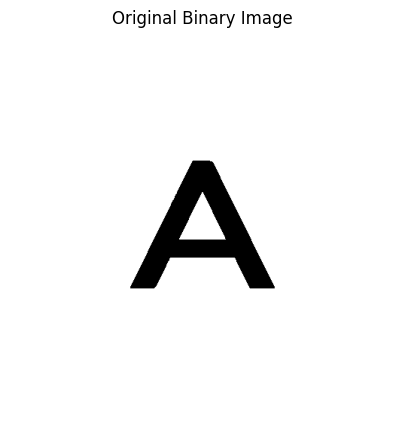

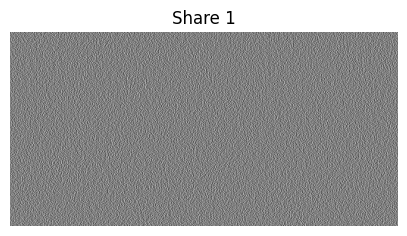

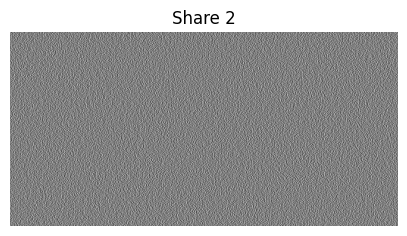

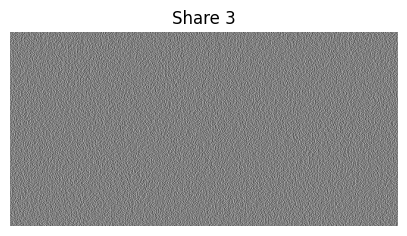

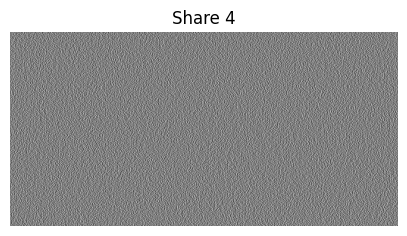

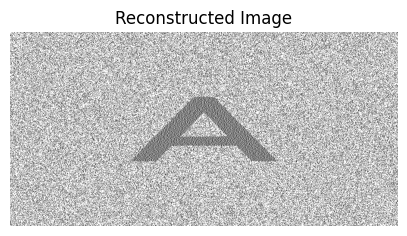

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations
import random


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def generate_random_functions(n, k):
    """Generate a collection of random functions mapping {1..n} -> {1..k}."""
    s = n * k  # Rule of thumb: s >= n * k
    return [lambda x, k=k: random.randint(0, k - 1) for _ in range(s)]


def construct_shares_k_out_n(image, k, n):
    """Generate shares using a k-out-of-n construction."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((n, height, width * num_subpixels), dtype=int)
    H = generate_random_functions(n, k)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            if pixel == 0:  # Black pixel
                subpixel_pattern = C0
            else:  # White pixel
                subpixel_pattern = C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]

            # Distribute shares based on functions in H
            for participant in range(n):
                h = H[random.randint(0, len(H) - 1)]
                row_index = h(participant)
                shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

    return shares


def reconstruct_image(shares, k):
    """Reconstruct the image from any k shares."""
    height, full_width = shares[0].shape
    num_subpixels = full_width // shares.shape[2]
    width = full_width // num_subpixels

    reconstructed = np.zeros((height, width), dtype=int)
    selected_shares = shares[:k]  # Use the first k shares (generalize as needed)

    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for s in range(k):
                subpixel_sum |= selected_shares[s, i, j * num_subpixels: (j + 1) * num_subpixels]

            # A pixel is white if the sum equals num_subpixels (all ones), else black
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed


def display_image_individually(image, title):
    """Display a single image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 2  # Minimum required shares
n = 4  # Total number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares_k_out_n(binary_image, k, n)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k)

# Step 4: Display the images individually
display_image_individually(binary_image, "Original Binary Image")

# Display each share individually
for i in range(n):
    display_image_individually(shares[i], f"Share {i + 1}")

# Display the reconstructed image
display_image_individually(reconstructed_image, "Reconstructed Image")

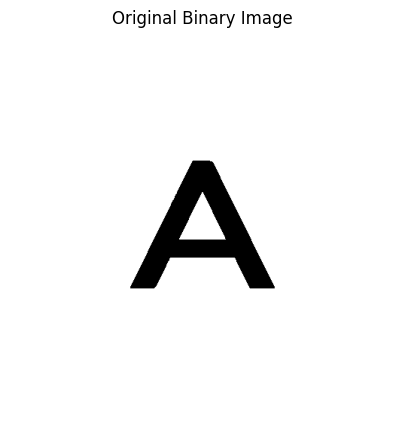

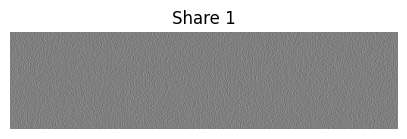

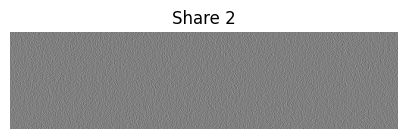

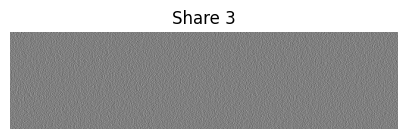

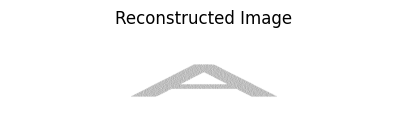

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations


def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Apply binary threshold
    return binary_image.astype(int)


def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets


def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)  # Equal to 2^(k-1)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)

    # Construct the matrices
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1

    return C0, C1


def construct_shares(image, k):
    """Generate shares using Construction 2."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((k, height, width * num_subpixels), dtype=int)

    # Generate shares for each pixel
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            subpixel_pattern = C0 if pixel == 0 else C1  # Black uses C0, White uses C1

            # Randomly permute columns for this pixel
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for s in range(k):
                shares[s, i, j * num_subpixels : (j + 1) * num_subpixels] = permuted_pattern[s]

    return shares


def reconstruct_image(shares, k):
    """Reconstruct the image by stacking the shares without resizing."""
    height, width = shares[0].shape  # Keep the same size as shares
    reconstructed = np.zeros((height, width), dtype=int)

    # Combine the shares using logical OR to stack layers
    for s in range(k):
        reconstructed |= shares[s]

    return reconstructed


def display_image(image, title):
    """Display an image with a title."""
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


# Parameters
k = 2  # Number of shares
image_path = "/home/arvind/VC/Alphabets/A.jpeg"

# Step 1: Convert image to binary
binary_image = binary_image_from_path(image_path)

# Step 2: Generate shares
shares = construct_shares(binary_image, k)

# Step 3: Reconstruct the image
reconstructed_image = reconstruct_image(shares, k)

# Step 4: Display the images
display_image(binary_image, "Original Binary Image")

# Display each share individually
for i in range(k):
    display_image(shares[i], f"Share {i + 1}")

# Display the reconstructed image
display_image(reconstructed_image, "Reconstructed Image")
